In [6]:
import glob
from tqdm import tqdm
import os
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
in_path = "../data/input/US_Sectors_2013/2013.Sectors.US.BC_AGR.1km.nc"
with xr.open_dataset(in_path) as ds:
    da = ds.PMb25.values

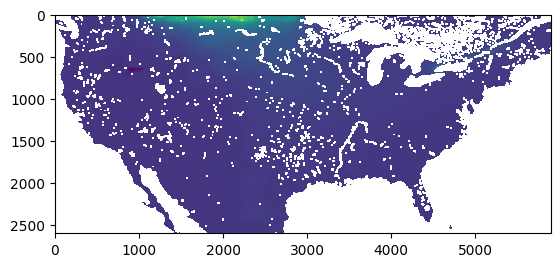

In [6]:
# plot da as img
plt.imshow(da[::-1])

In [7]:
files = glob.glob("../data/input/US_Sectors_2013/*.nc")
# read all arrays in dict
arrays = {}
for f in tqdm(files):
    with xr.open_dataset(f) as ds:
        arrays[os.path.basename(f)] = ds.PM25.values

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [03:20<00:00,  2.79s/it]


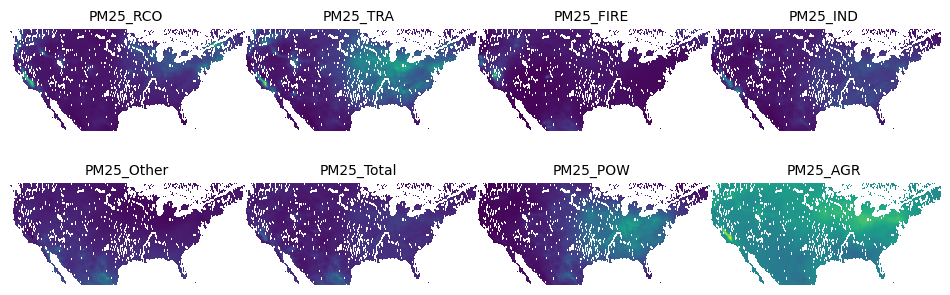

In [13]:

def plot_sector(arrays, sector):
    # make a big plot of 4 colums and 3 rows
    sector_keys = pm25_keys = {k for k in arrays.keys() if sector in k}
    fig, axs = plt.subplots(2, 4, figsize=(12, 4))
    for i, k in enumerate(sector_keys):
        v = arrays[k]
        title = k.split(".")[-3]
        axs[i // 4, i % 4].imshow(v[::-1])
        axs[i // 4, i % 4].set_title(title, fontsize=10)
        axs[i // 4, i % 4].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)

plot_sector(arrays, "PM25")

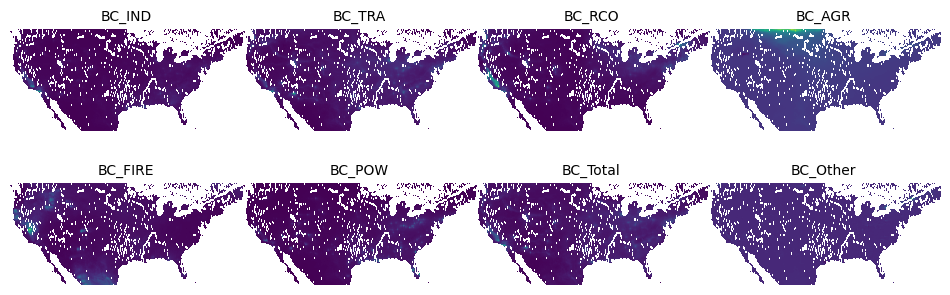

In [14]:
plot_sector(arrays, "BC_")

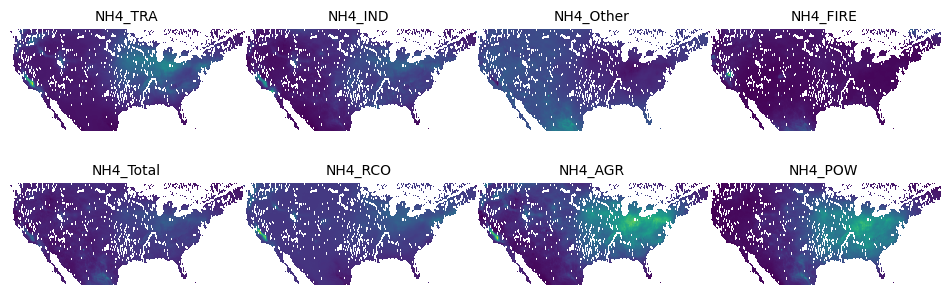

In [15]:
plot_sector(arrays, "NH4_")

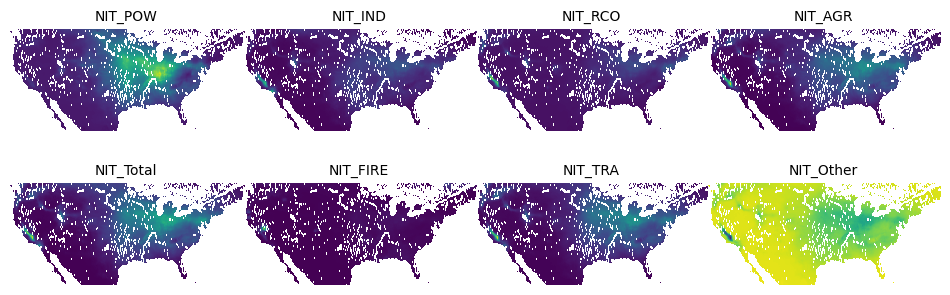

In [16]:
plot_sector(arrays, "NIT_")

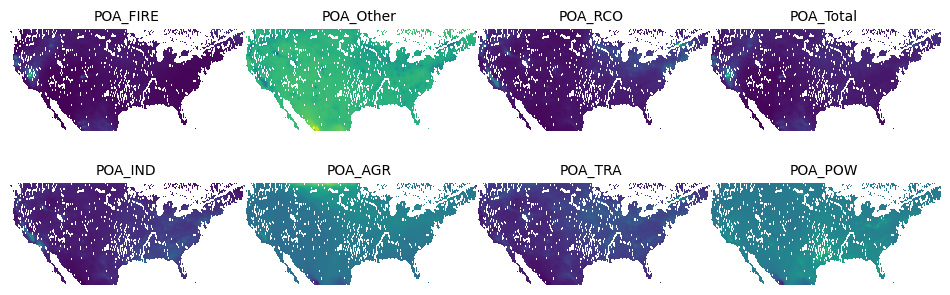

In [17]:
plot_sector(arrays, "POA_")

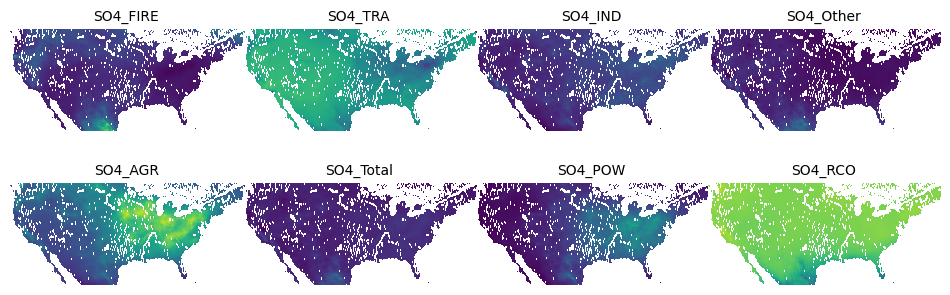

In [18]:
plot_sector(arrays, "SO4_")

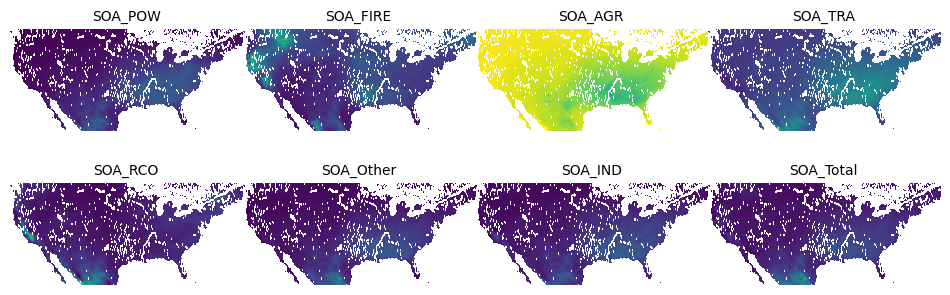

In [19]:
plot_sector(arrays, "SOA_")

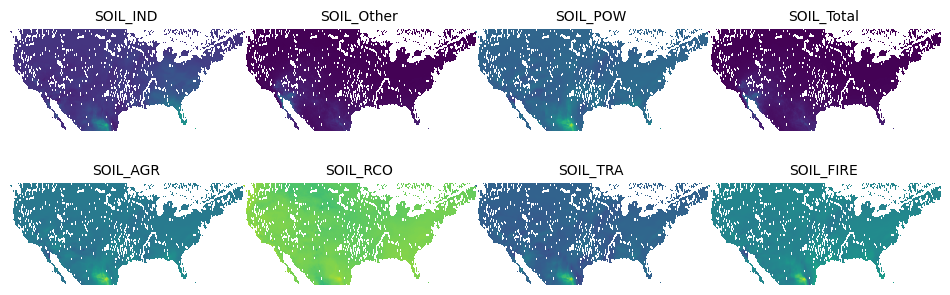

In [20]:
plot_sector(arrays, "SOIL_")

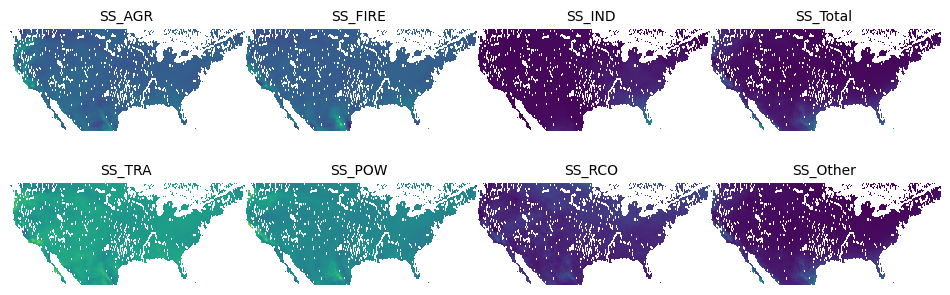

In [21]:
plot_sector(arrays, "SS_")